<a href="https://colab.research.google.com/github/reitezuz/18NES2-2025/blob/main/week_05/functional_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Functional API
- examples of models with non-sequential architecture

## Sequential API examples

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_26 (Dense)                │ (None, 16)             │       160,016 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_27 (Dense)                │ (None, 16)             │           272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_11 (Dropout)            │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_28 (Dense)                │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 160,305 (626.19 KB)

 Trainable params: 160,305 (626.19 KB)

 Non-trainable params: 0 (0.00 B)

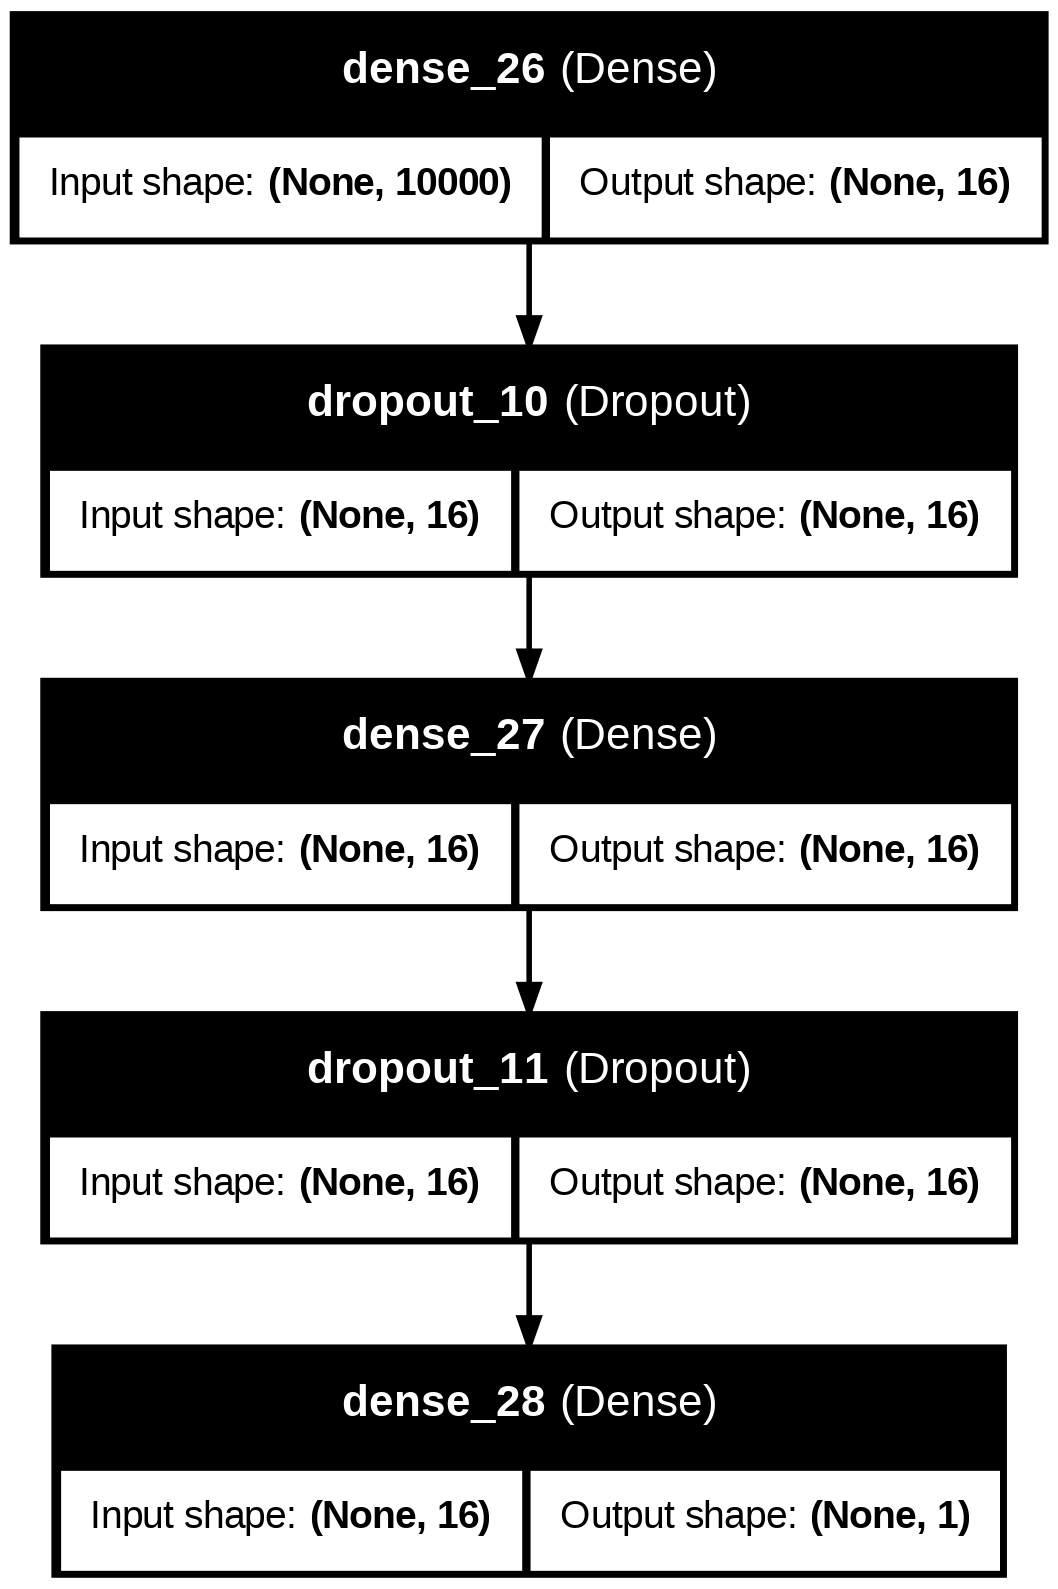

In [8]:
# Keras: sequential API (MLP)
import keras
model = keras.Sequential([
    keras.layers.InputLayer(shape=(10000,)),
    keras.layers.Dense(16, activation='relu'),
    keras.layers.Dropout(0.1),
    keras.layers.Dense(16, activation='relu'),
    keras.layers.Dropout(0.1),
    keras.layers.Dense(1, activation='sigmoid')  # output layer
])

model.summary()

keras.utils.plot_model(model, to_file="sequential_model.png", show_shapes=True, show_layer_names=True)
from IPython.display import Image, display
display(Image(filename="sequential_model.png", width=400))

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_10 (Conv2D)              │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_5 (Flatten)             │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_29 (Dense)                │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_30 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

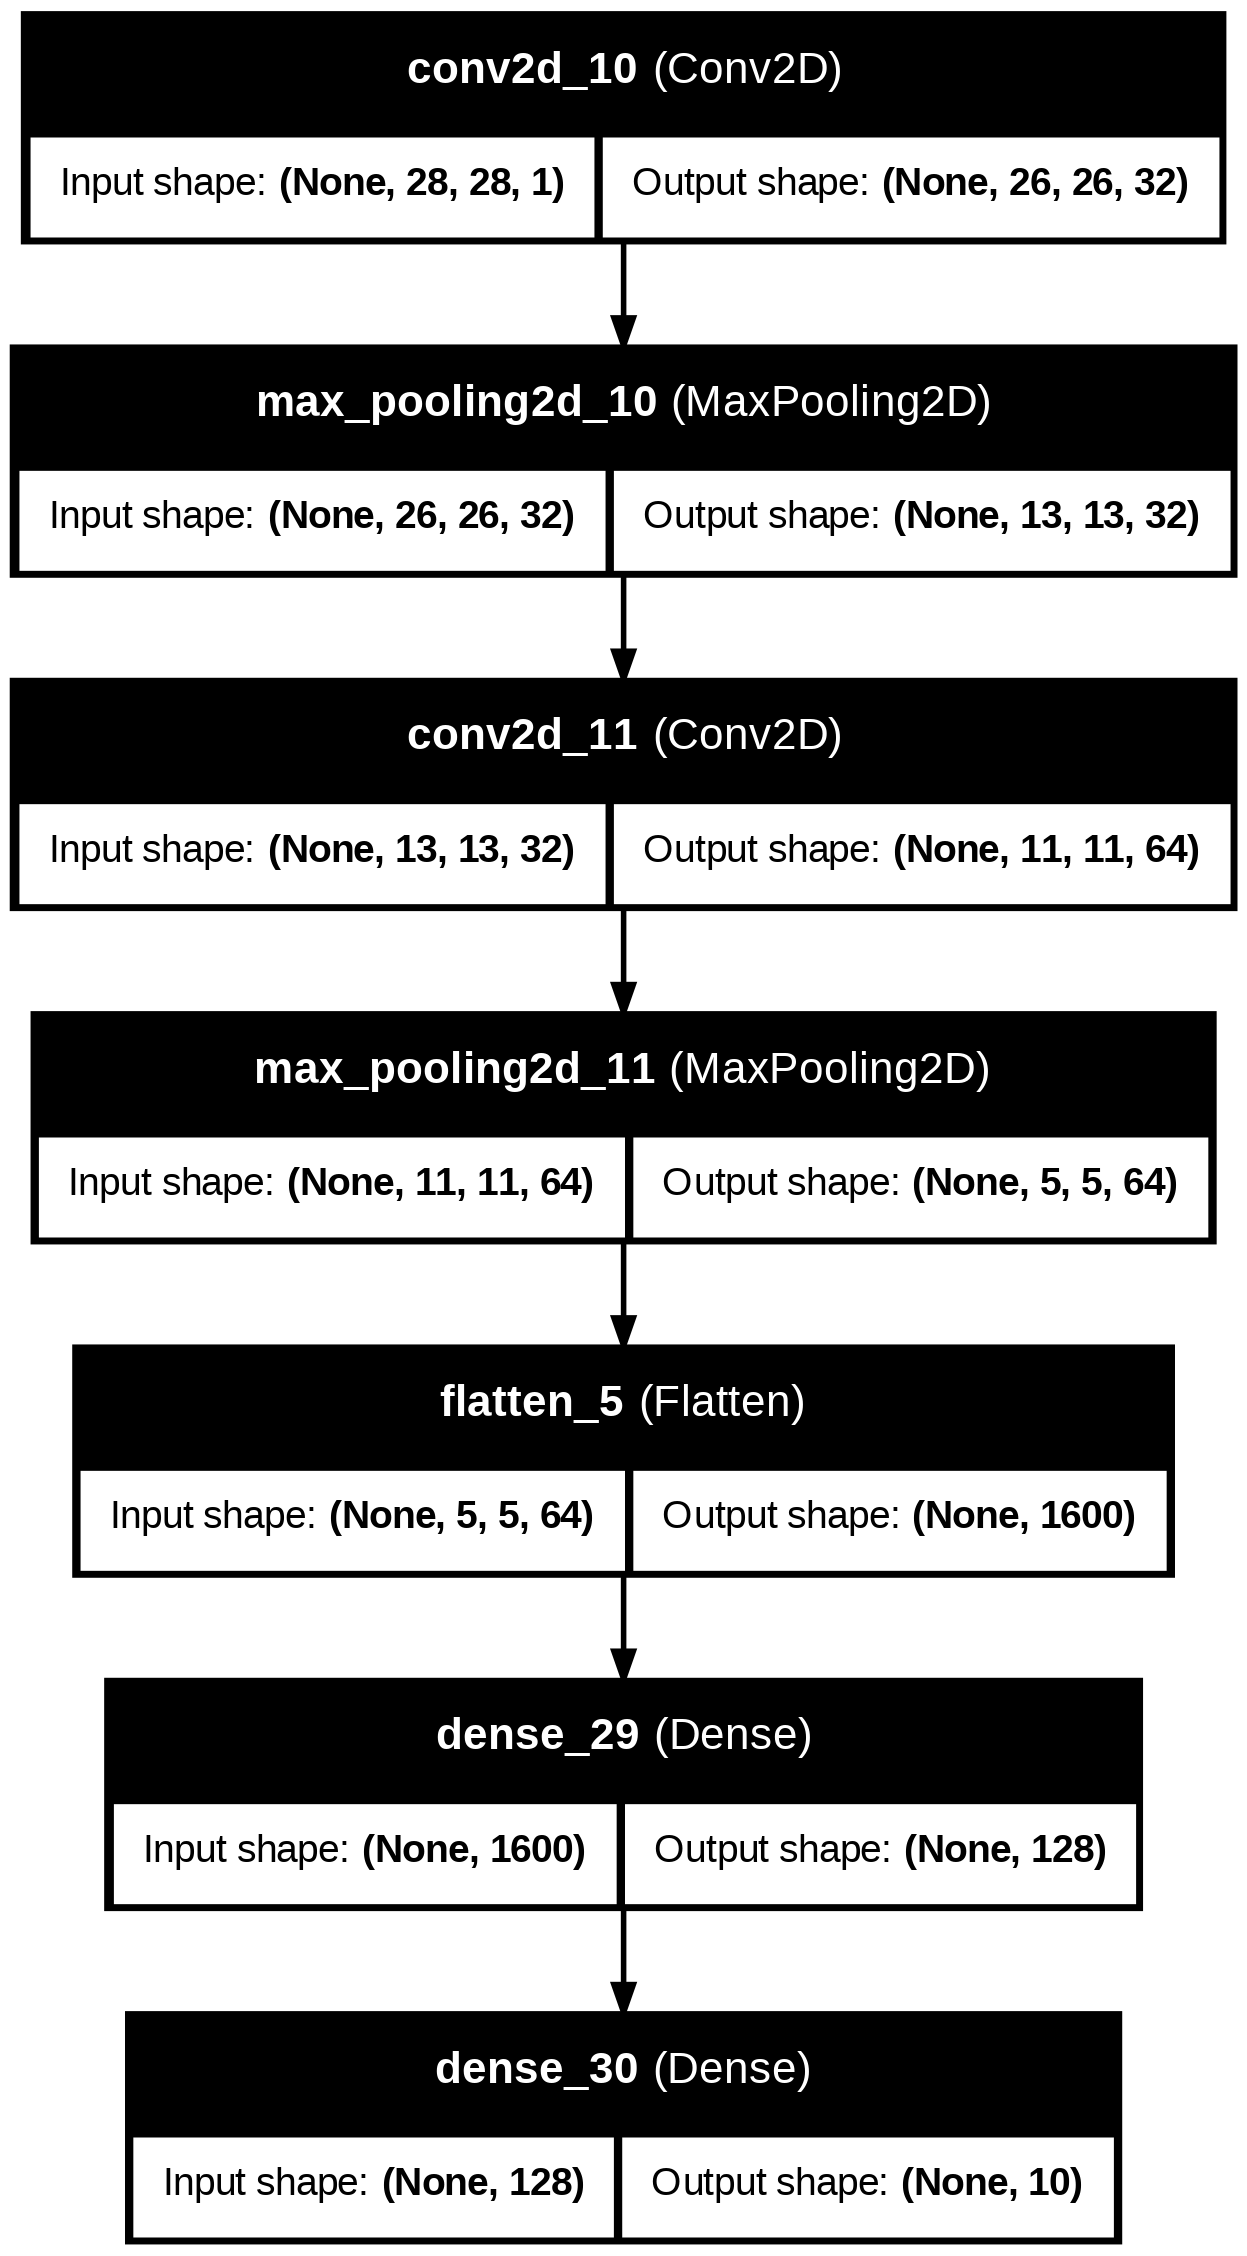

In [9]:
# Keras: sequential API (CNN)
import keras
model = keras.Sequential([
    keras.Input(shape=(28, 28, 1)),
    keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu'),
    keras.layers.MaxPooling2D(pool_size=(2, 2)),
    keras.layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
    keras.layers.MaxPooling2D(pool_size=(2, 2)),

    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    #keras.layers.Dropout(0.5),
    keras.layers.Dense(10, activation='softmax')
])

model.summary()

keras.utils.plot_model(model, to_file="sequential_model.png", show_shapes=True, show_layer_names=True)
from IPython.display import Image, display
display(Image(filename="sequential_model.png", width=400))

## Functional API examples
- on the same examples

Model: "functional_14"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_15 (InputLayer)     │ (None, 10000)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_31 (Dense)                │ (None, 16)             │       160,016 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_12 (Dropout)            │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_32 (Dense)                │ (None, 16)             │           272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_13 (Dropout)            │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_33 (Dense)                │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 160,305 (626.19 KB)

 Trainable params: 160,305 (626.19 KB)

 Non-trainable params: 0 (0.00 B)

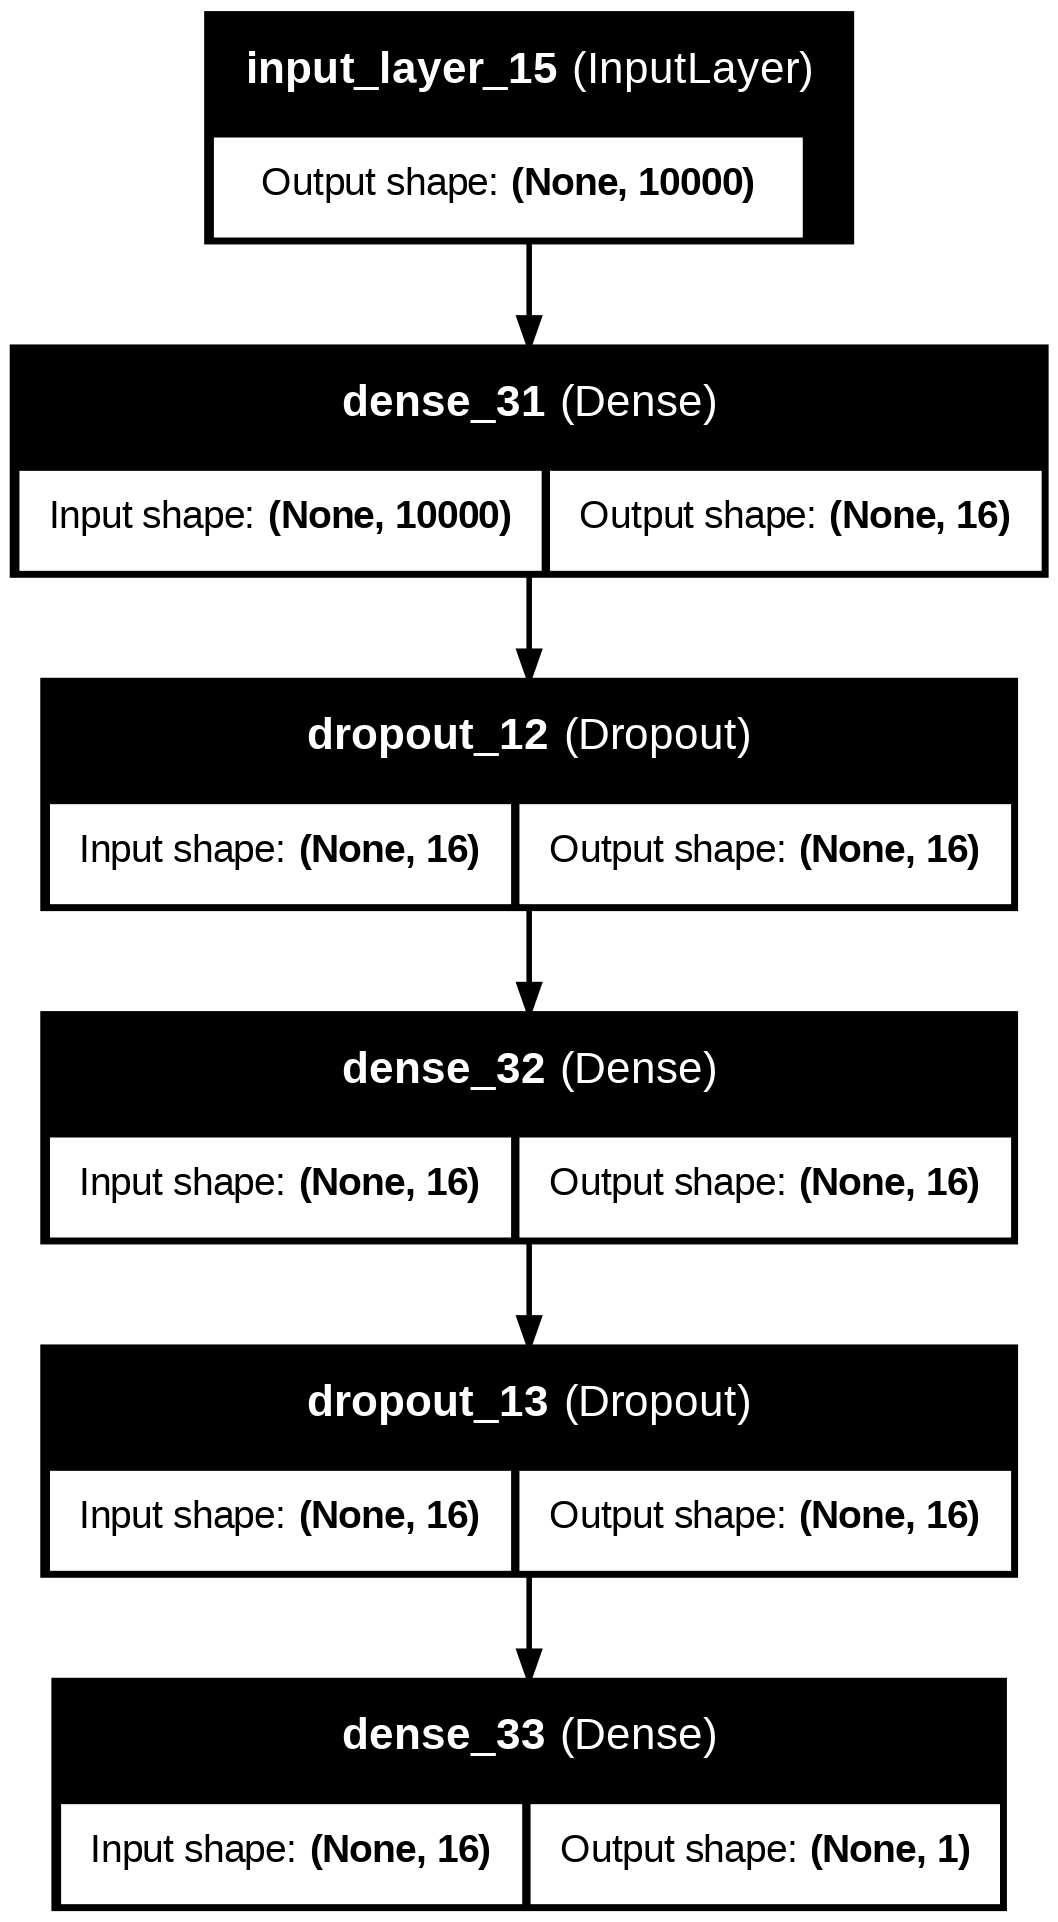

In [10]:
# Keras: functional API (MLP)
import keras

# Define the input
inputs = keras.Input(shape=(10000,))

# Define the model architecture
x = keras.layers.Dense(16, activation='relu')(inputs)
x = keras.layers.Dropout(0.1)(x)
x = keras.layers.Dense(16, activation='relu')(x)
x = keras.layers.Dropout(0.1)(x)
outputs = keras.layers.Dense(1, activation='sigmoid')(x)

# Create the model
model = keras.Model(inputs=inputs, outputs=outputs)

# Display the model summary
model.summary()

keras.utils.plot_model(model, to_file="functional_model.png", show_shapes=True, show_layer_names=True)
from IPython.display import Image, display
display(Image(filename="functional_model.png", width=400))

Model: "functional_15"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_16 (InputLayer)     │ (None, 28, 28, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_12 (Conv2D)              │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_12 (MaxPooling2D) │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_13 (MaxPooling2D) │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_6 (Flatten)             │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_34 (Dense)                │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_35 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

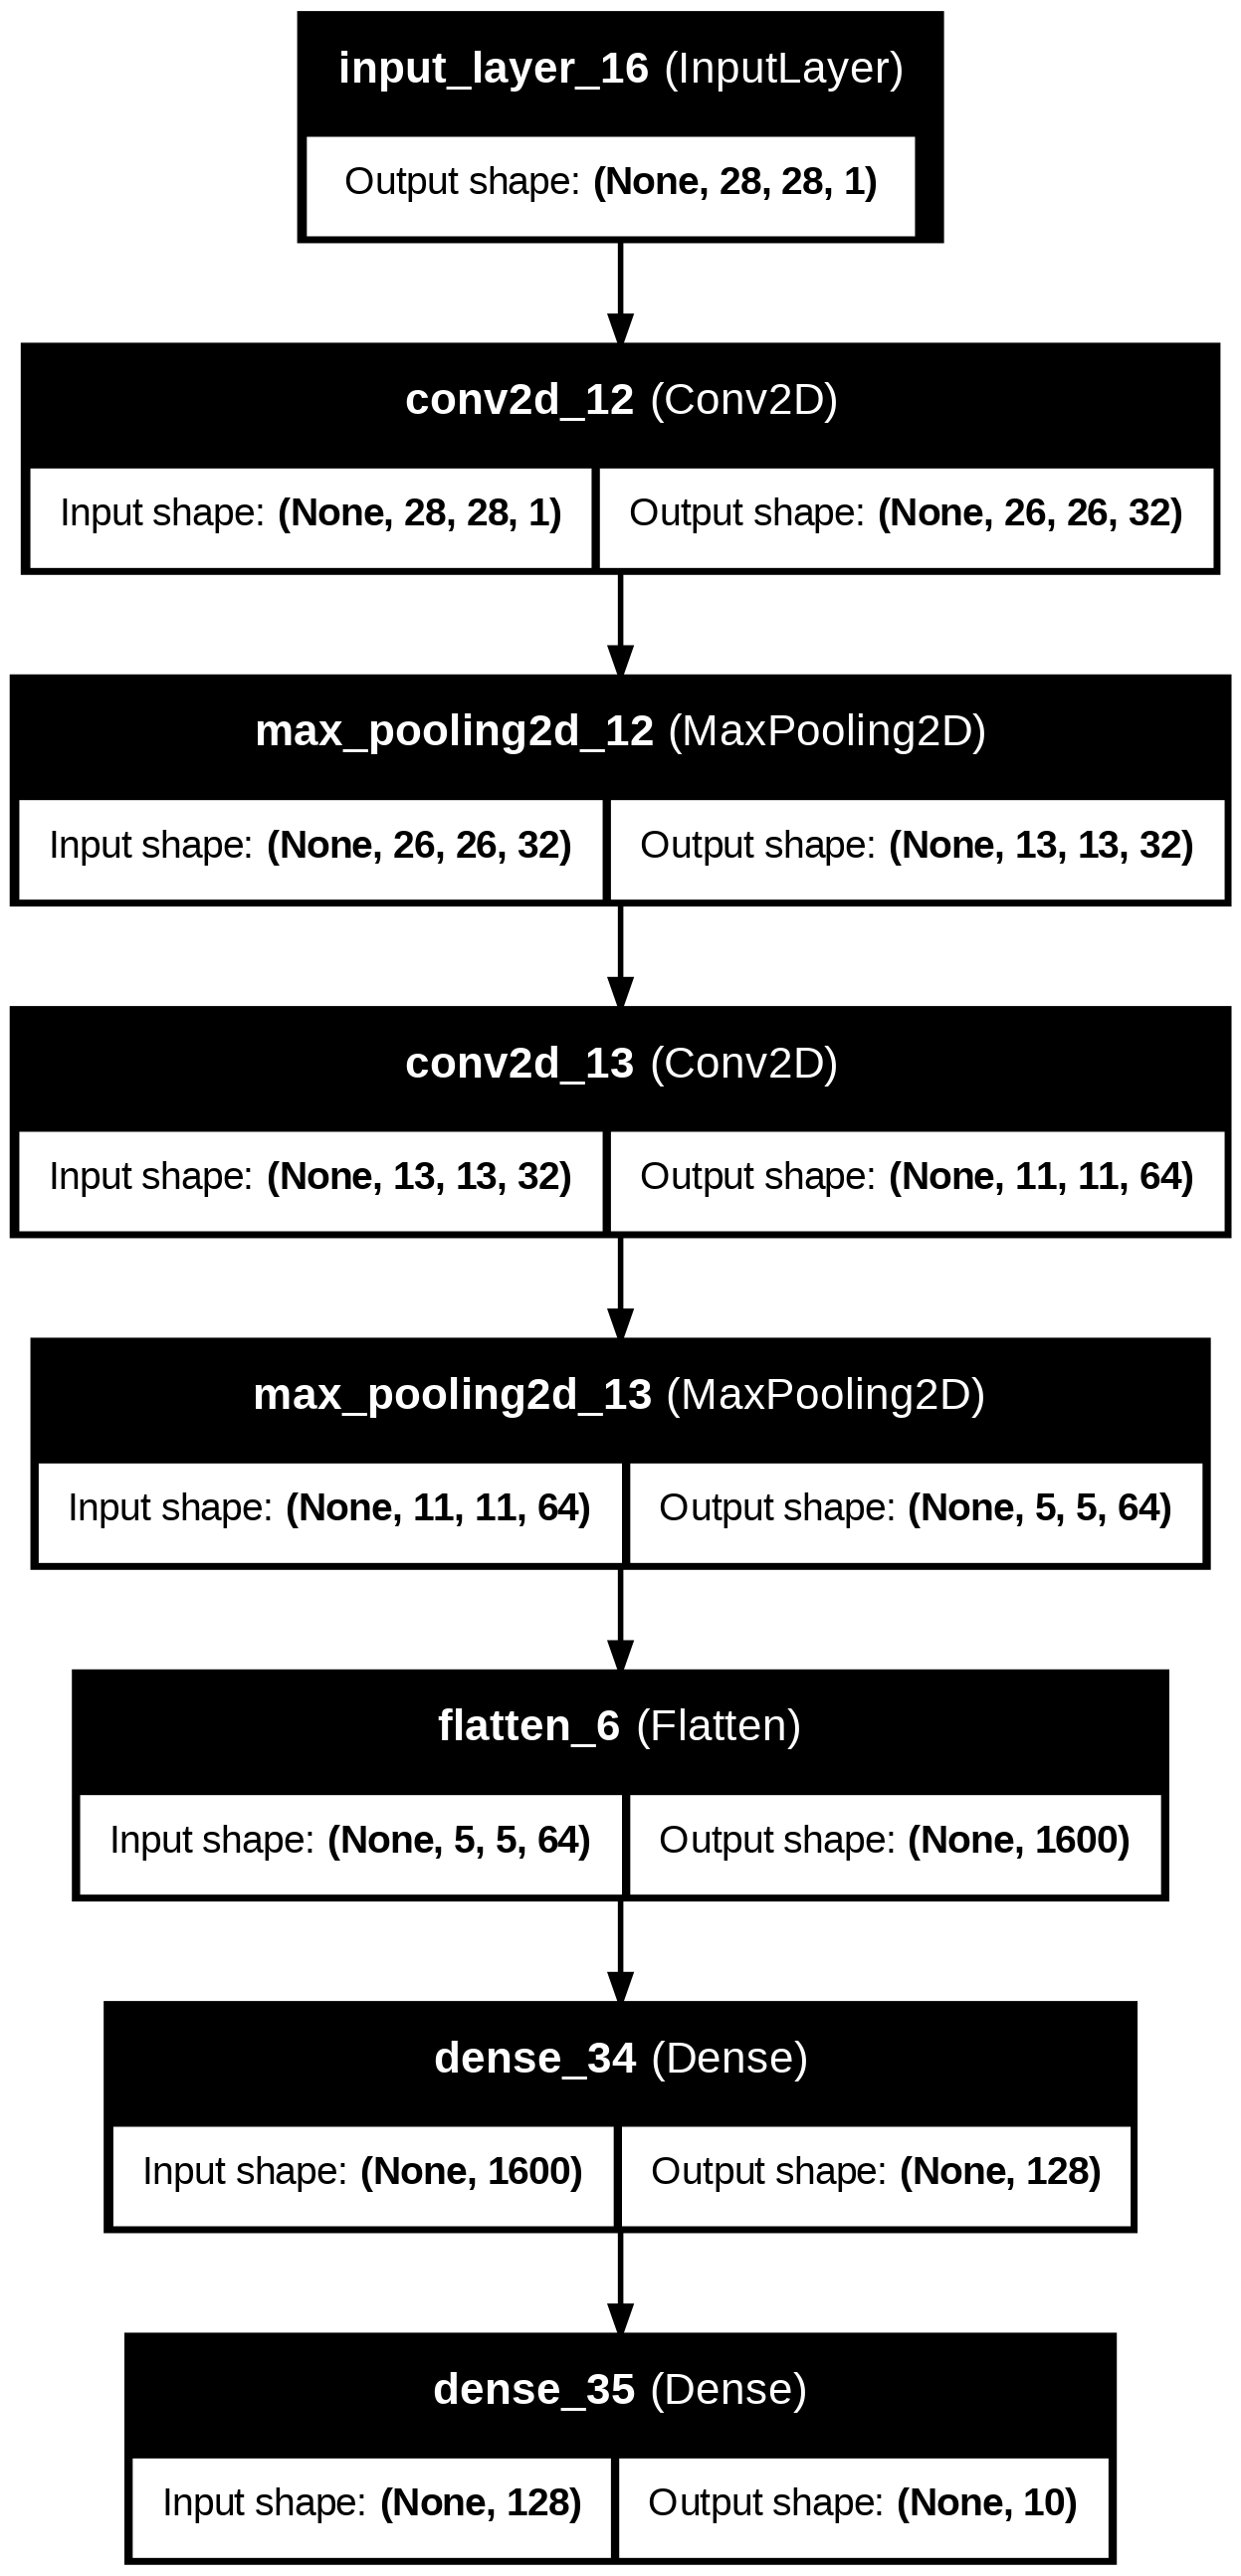

In [11]:
# Keras: functional API (CNN)
import keras

# Define the input
inputs = keras.layers.Input(shape=(28, 28, 1))

# Define the model architecture
x = keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu')(inputs)
x = keras.layers.MaxPooling2D(pool_size=(2, 2))(x)
x = keras.layers.Conv2D(64, kernel_size=(3, 3), activation='relu')(x)
x = keras.layers.MaxPooling2D(pool_size=(2, 2))(x)

x = keras.layers.Flatten()(x)
x = keras.layers.Dense(128, activation='relu')(x)
# x = layers.Dropout(0.5)(x)
outputs = keras.layers.Dense(10, activation='softmax')(x)

# Create the model
model = keras.models.Model(inputs=inputs, outputs=outputs)

# Display the model summary
model.summary()

keras.utils.plot_model(model, to_file="functional_model.png", show_shapes=True, show_layer_names=True)
from IPython.display import Image, display
display(Image(filename="functional_model.png", width=400))

## More complex models

### Model with branhes

Model: "functional_16"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_17      │ (None, 64)        │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_36 (Dense)    │ (None, 32)        │      2,080 │ input_layer_17[0… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_38 (Dense)    │ (None, 64)        │      4,160 │ input_layer_17[0… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_37 (Dense)    │ (None, 16)        │        528 │ dense_36[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_39 (Dense)    │ (None, 32)        │      2,080 │ dense_38[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate         │ (None, 48)        │          0 │ dense_37[0][0],   │
│ (Concatenate)       │                   │            │ dense_39[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_40 (Dense)    │ (None, 32)        │      1,568 │ concatenate[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_41 (Dense)    │ (None, 1)         │         33 │ dense_40[0][0]    │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 10,449 (40.82 KB)

 Trainable params: 10,449 (40.82 KB)

 Non-trainable params: 0 (0.00 B)

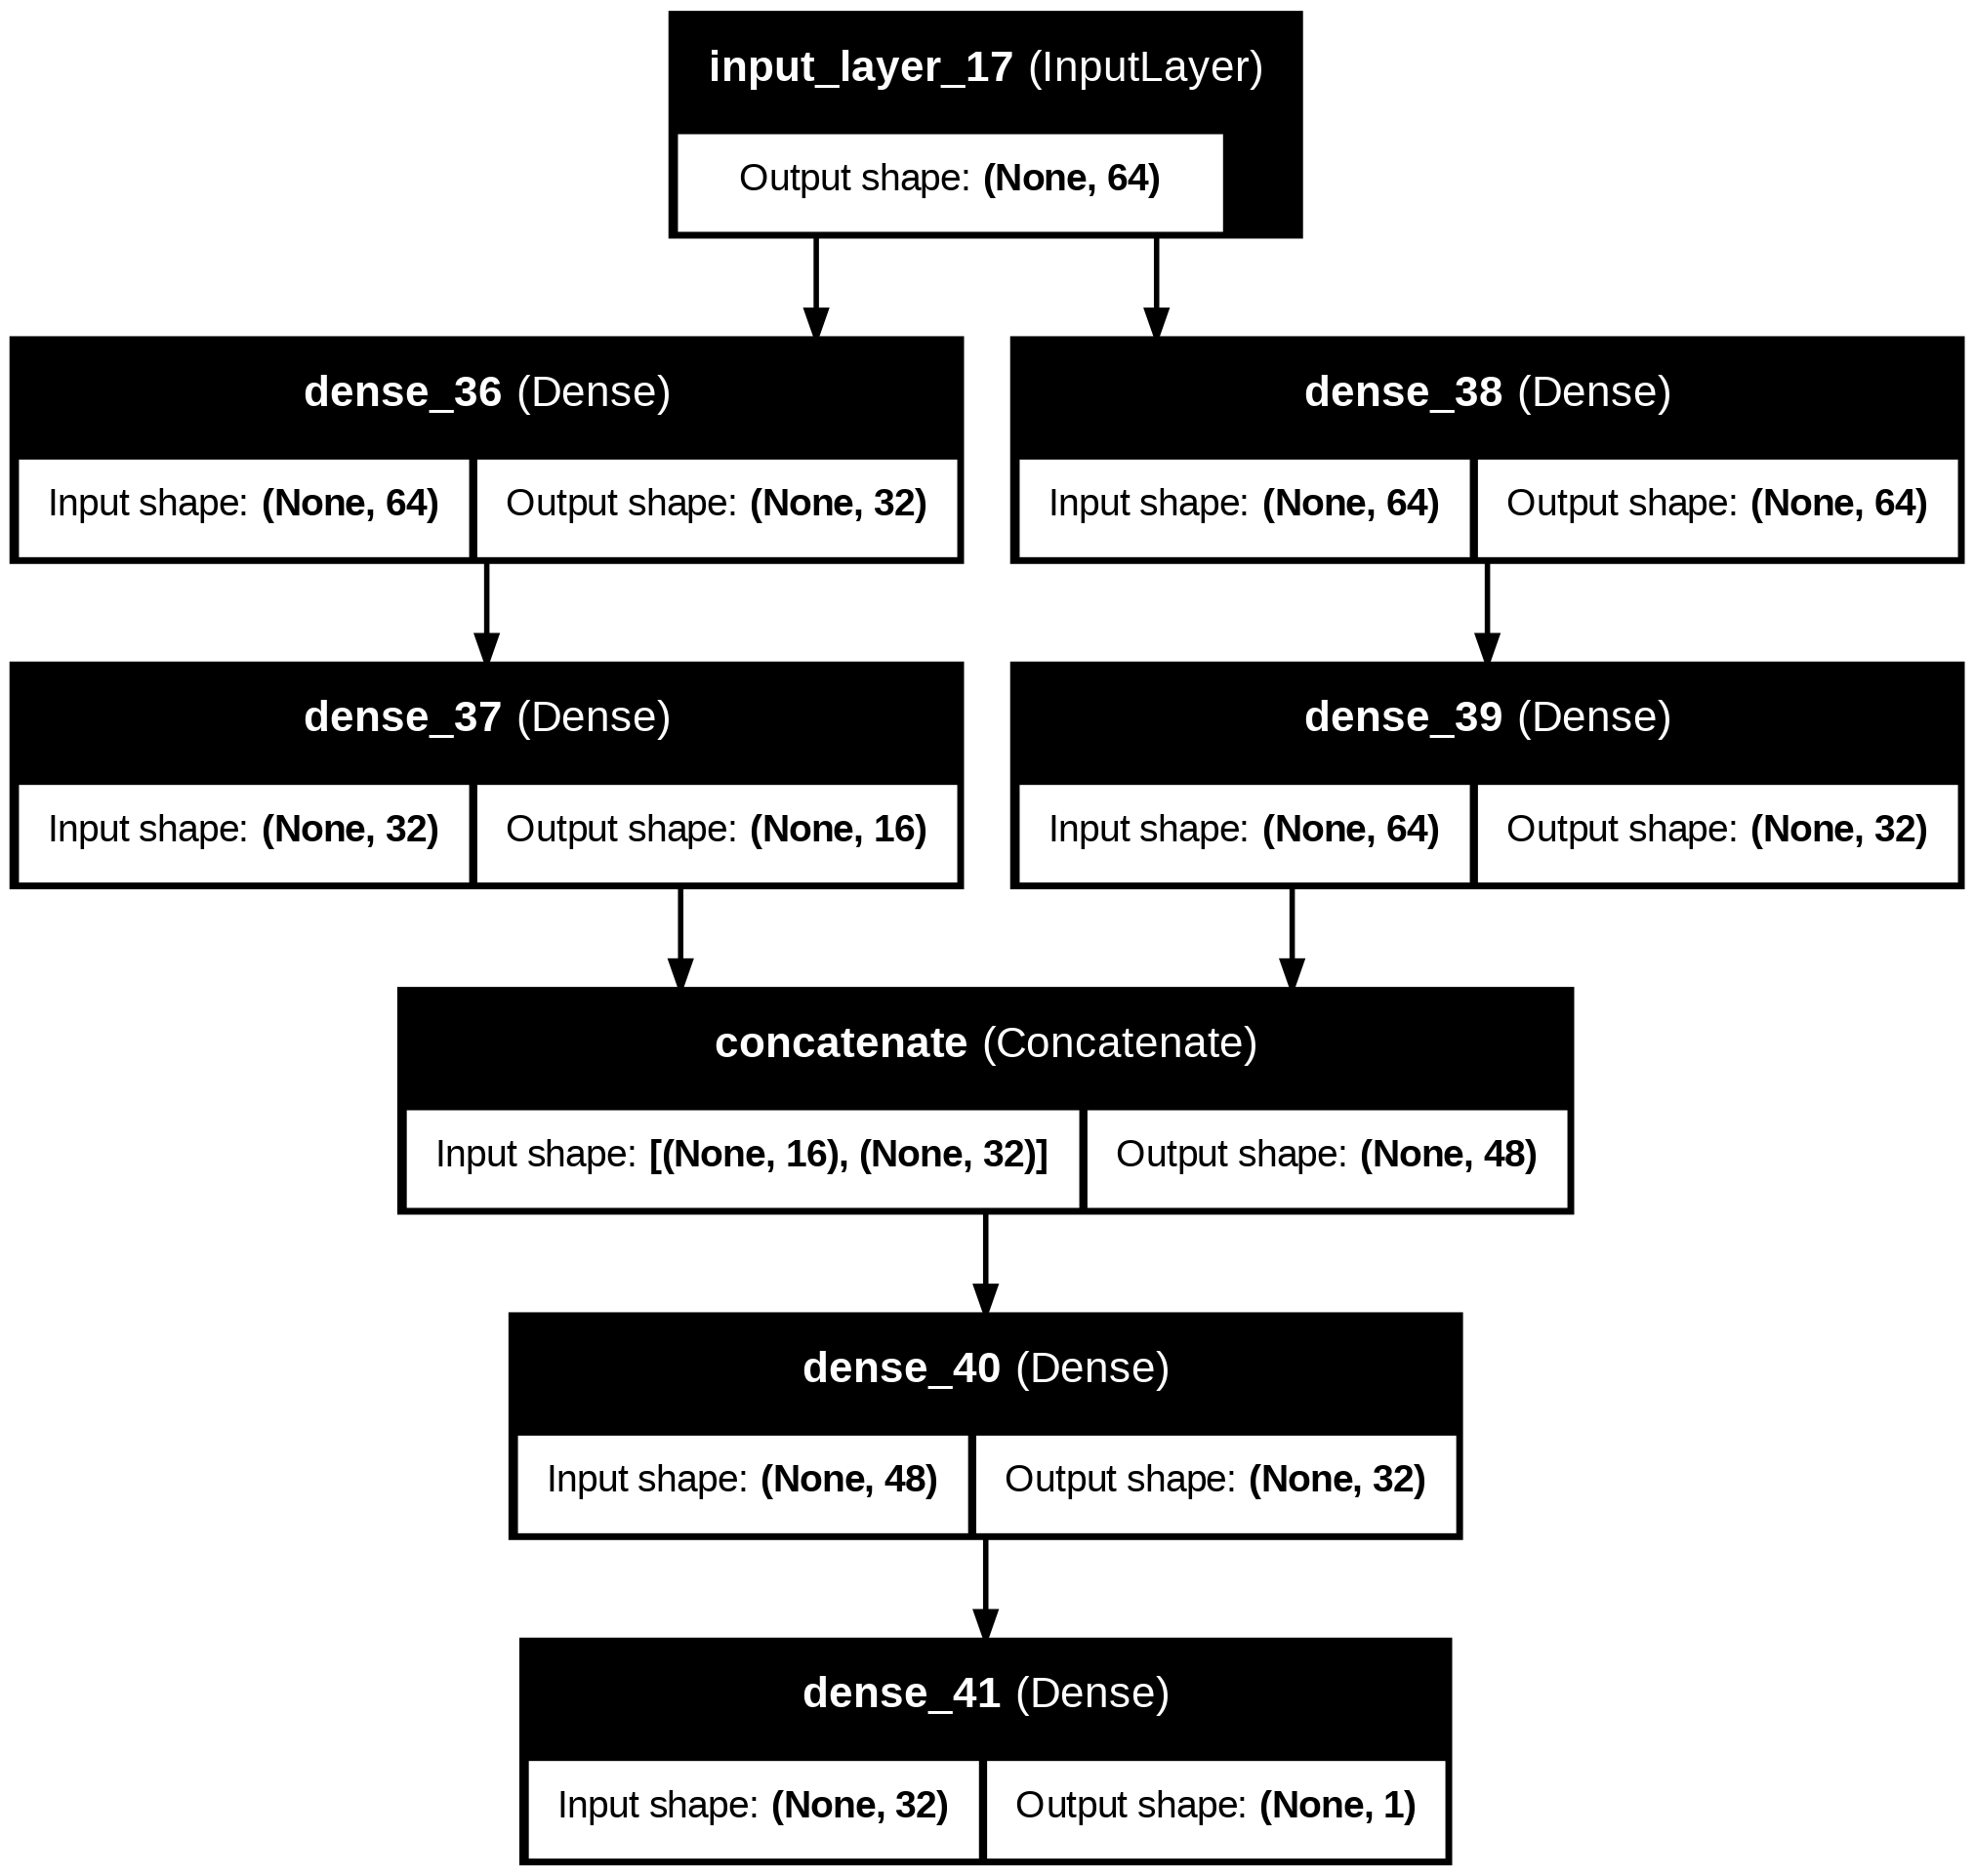

In [12]:
# Keras: branches
import keras

# Define the input layer
input_layer = keras.Input(shape=(64,))

# First branch
x1 = keras.layers.Dense(32, activation='relu')(input_layer)
x1 = keras.layers.Dense(16, activation='relu')(x1)

# Second branch
x2 = keras.layers.Dense(64, activation='relu')(input_layer)
x2 = keras.layers.Dense(32, activation='relu')(x2)

# Combine the branches by concatenating
combined = keras.layers.Concatenate()([x1, x2])

# Final dense layers on the combined input
x = keras.layers.Dense(32, activation='relu')(combined)
output_layer = keras.layers.Dense(1, activation='sigmoid')(x)  # Binary output example

# Create the model
model = keras.models.Model(inputs=input_layer, outputs=output_layer)

# Display the model summary
model.summary()
keras.utils.plot_model(model, to_file="branched_model.png", show_shapes=True, show_layer_names=True)
from IPython.display import Image, display
display(Image(filename="branched_model.png", width=700))

### MLP ensemble model

Model: "functional_20"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_18      │ (None, 1000)      │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ functional_17       │ (None, 1)         │     16,305 │ input_layer_18[0… │
│ (Functional)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ functional_18       │ (None, 1)         │     16,305 │ input_layer_18[0… │
│ (Functional)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ functional_19       │ (None, 1)         │     16,305 │ input_layer_18[0… │
│ (Functional)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ average_2 (Average) │ (None, 1)         │          0 │ functional_17[0]… │
│                     │                   │            │ functional_18[0]… │
│                     │                   │            │ functional_19[0]… │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 48,915 (191.07 KB)

 Trainable params: 48,915 (191.07 KB)

 Non-trainable params: 0 (0.00 B)

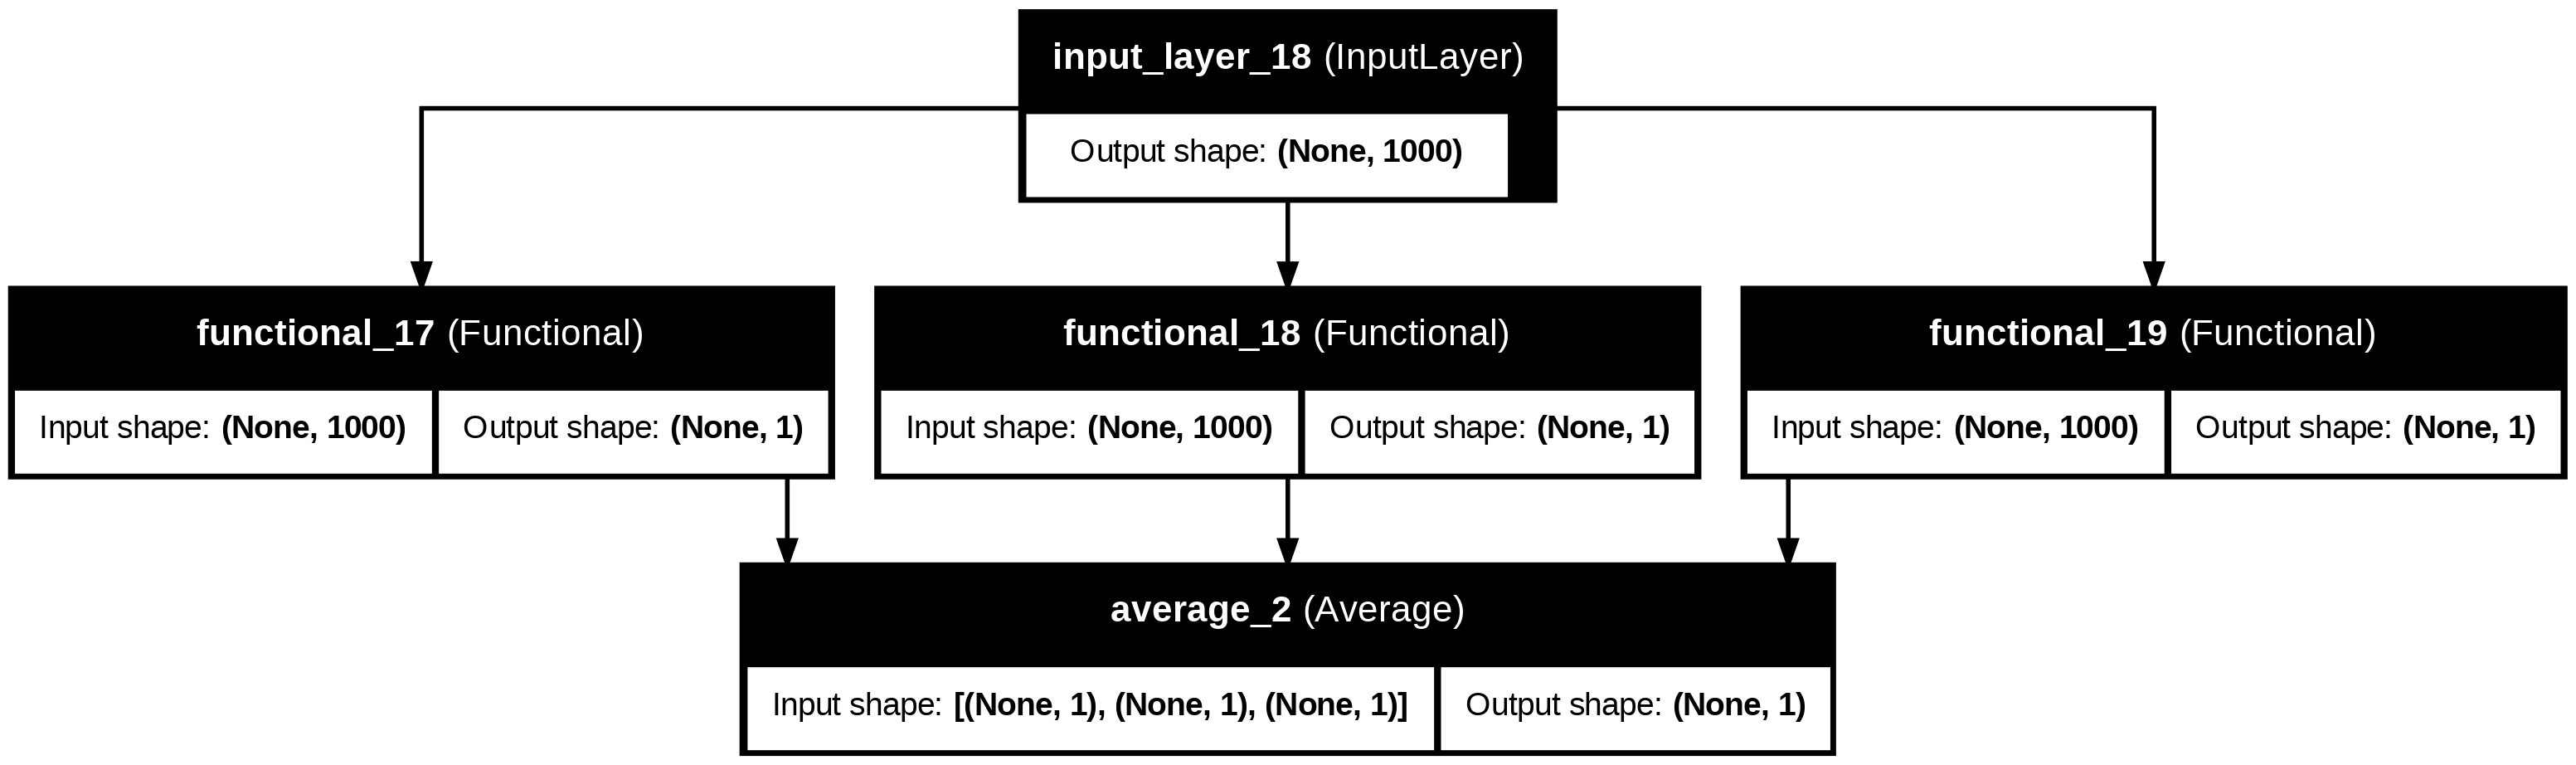

In [13]:
def create_single_model(input_dim):
   inputs = keras.Input(shape=(input_dim,))
   x = keras.layers.Dense(16, activation='relu')(inputs)
   x = keras.layers.Dropout(0.1)(x)
   x = keras.layers.Dense(16, activation='relu')(x)
   x = keras.layers.Dropout(0.1)(x)
   outputs = keras.layers.Dense(1, activation='sigmoid')(x)
   model = keras.Model(inputs, outputs)
   return model

ensemble_size=3

# Common input layer
input_layer = keras.Input(shape=(1000,))

# Generate submodels dynamically
submodels = [create_single_model(1000) for _ in range(ensemble_size)]

# Collect their outputs
outputs = [m(input_layer) for m in submodels]

# Average the outputs
averaged_output = keras.layers.Average()(outputs)

# Final ensemble model
model = keras.Model(inputs=input_layer, outputs=averaged_output)

model.summary()

keras.utils.plot_model(model, to_file="ensemble_model.png", show_shapes=True, show_layer_names=True)
from IPython.display import Image, display
display(Image(filename="ensemble_model.png", width=800))


Model: "functional_24"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_22      │ (None, 28, 28, 1) │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ functional_21       │ (None, 10)        │    225,034 │ input_layer_22[0… │
│ (Functional)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ functional_22       │ (None, 10)        │    225,034 │ input_layer_22[0… │
│ (Functional)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ functional_23       │ (None, 10)        │    225,034 │ input_layer_22[0… │
│ (Functional)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ average_3 (Average) │ (None, 10)        │          0 │ functional_21[0]… │
│                     │                   │            │ functional_22[0]… │
│                     │                   │            │ functional_23[0]… │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 675,102 (2.58 MB)

 Trainable params: 675,102 (2.58 MB)

 Non-trainable params: 0 (0.00 B)

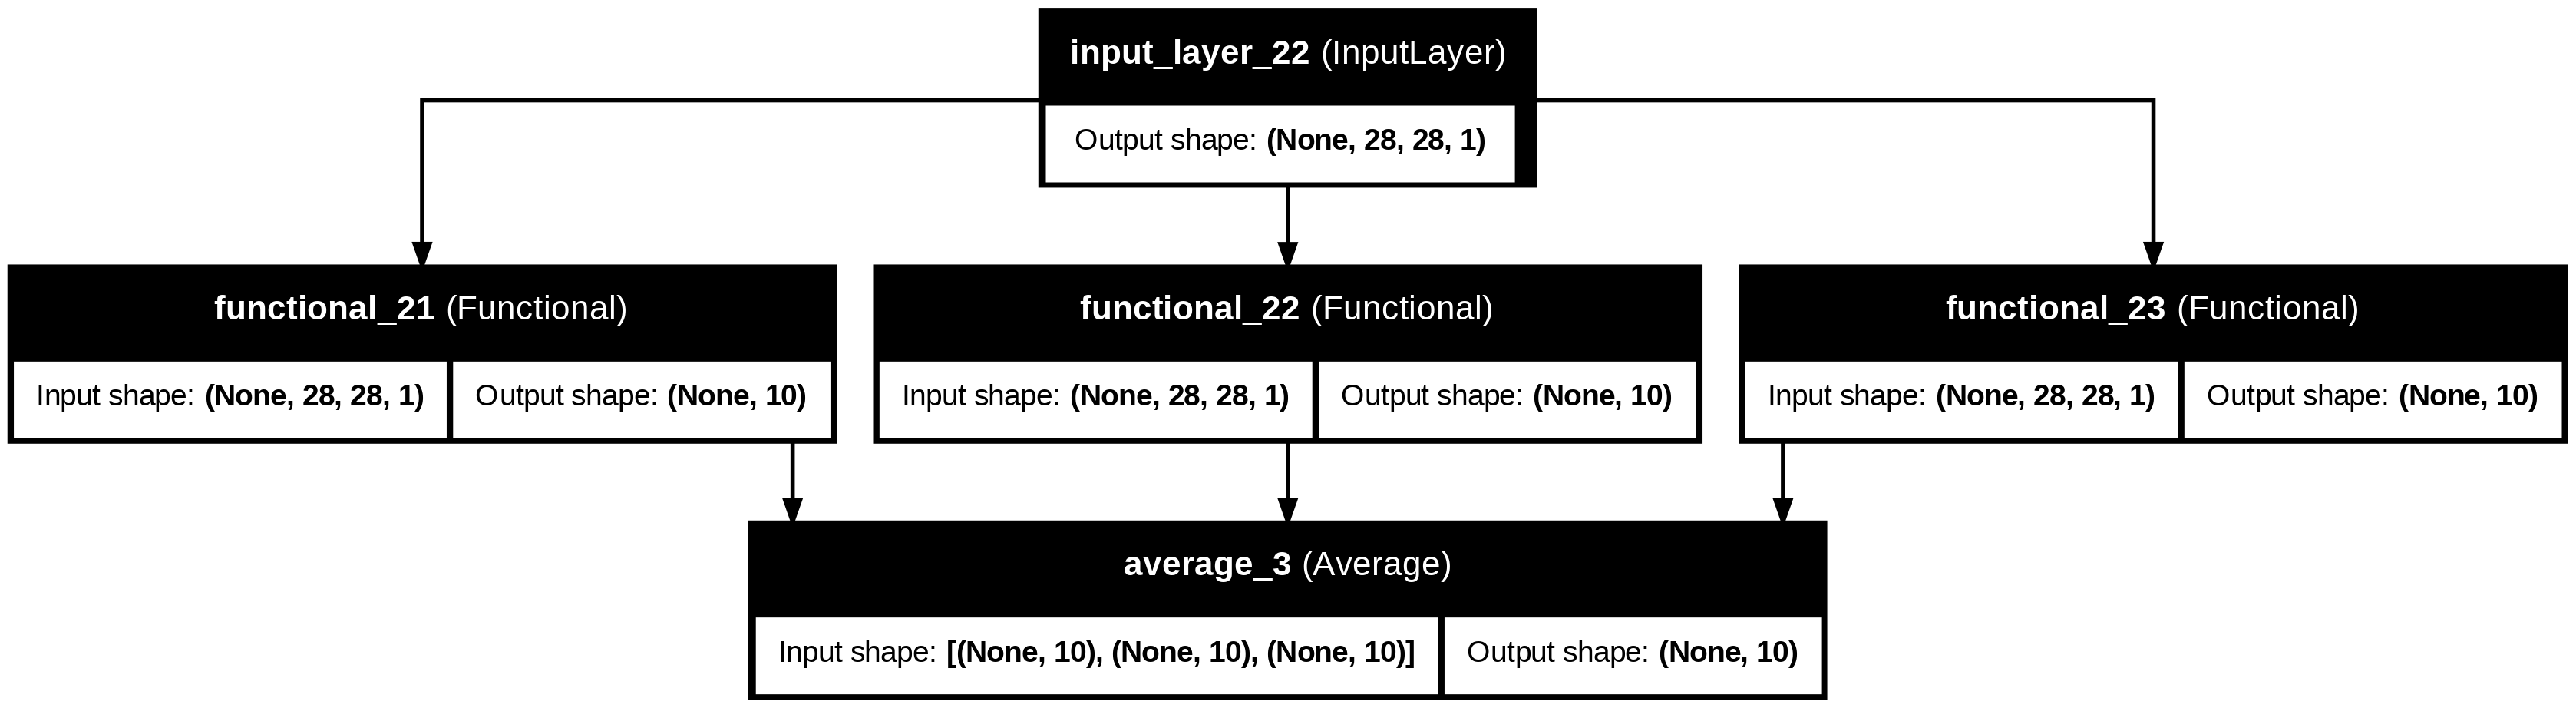

In [14]:
# CNN ensemble model
import keras
def create_cnn_model(input_shape):
    inputs = keras.Input(shape=input_shape)
    x = keras.layers.Conv2D(32, (3, 3), activation='relu')(inputs)
    x = keras.layers.MaxPooling2D((2, 2))(x)
    x = keras.layers.Conv2D(64, (3, 3), activation='relu')(x)
    x = keras.layers.MaxPooling2D((2, 2))(x)
    x = keras.layers.Flatten()(x)
    x = keras.layers.Dense(128, activation='relu')(x)
    outputs = keras.layers.Dense(10, activation='softmax')(x)
    model = keras.models.Model(inputs=inputs, outputs=outputs)
    return model

# Input layer
input_shape = (28, 28, 1)
input_layer = keras.Input(shape=input_shape)

# More CNN models
cnn_1 = create_cnn_model(input_shape)
cnn_2 = create_cnn_model(input_shape)
cnn_3 = create_cnn_model(input_shape)

# Submodels' outputs:
output_1 = cnn_1(input_layer)
output_2 = cnn_2(input_layer)
output_3 = cnn_3(input_layer)

# average the outputs
averaged_output = keras.layers.Average()([output_1, output_2, output_3])

# final model
model = keras.models.Model(inputs=input_layer, outputs=averaged_output)

model.summary()

keras.utils.plot_model(model, to_file="ensemble_cnn_model.png", show_shapes=True, show_layer_names=True)
from IPython.display import Image, display
display(Image(filename="ensemble_cnn_model.png", width=800))

### Multi-input, multi-output model

Model: "functional_25"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input1 (InputLayer) │ (None, 64)        │          0 │ -                 │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ input2 (InputLayer) │ (None, 32)        │          0 │ -                 │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_57 (Dense)    │ (None, 32)        │      2,080 │ input1[0][0]      │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_59 (Dense)    │ (None, 16)        │        528 │ input2[0][0]      │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_58 (Dense)    │ (None, 16)        │        528 │ dense_57[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_60 (Dense)    │ (None, 8)         │        136 │ dense_59[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_1       │ (None, 24)        │          0 │ dense_58[0][0],   │
│ (Concatenate)       │                   │            │ dense_60[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_61 (Dense)    │ (None, 64)        │      1,600 │ concatenate_1[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_62 (Dense)    │ (None, 32)        │      2,080 │ dense_61[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ output1 (Dense)     │ (None, 1)         │         33 │ dense_62[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ output2 (Dense)     │ (None, 10)        │        330 │ dense_62[0][0]    │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 7,315 (28.57 KB)

 Trainable params: 7,315 (28.57 KB)

 Non-trainable params: 0 (0.00 B)

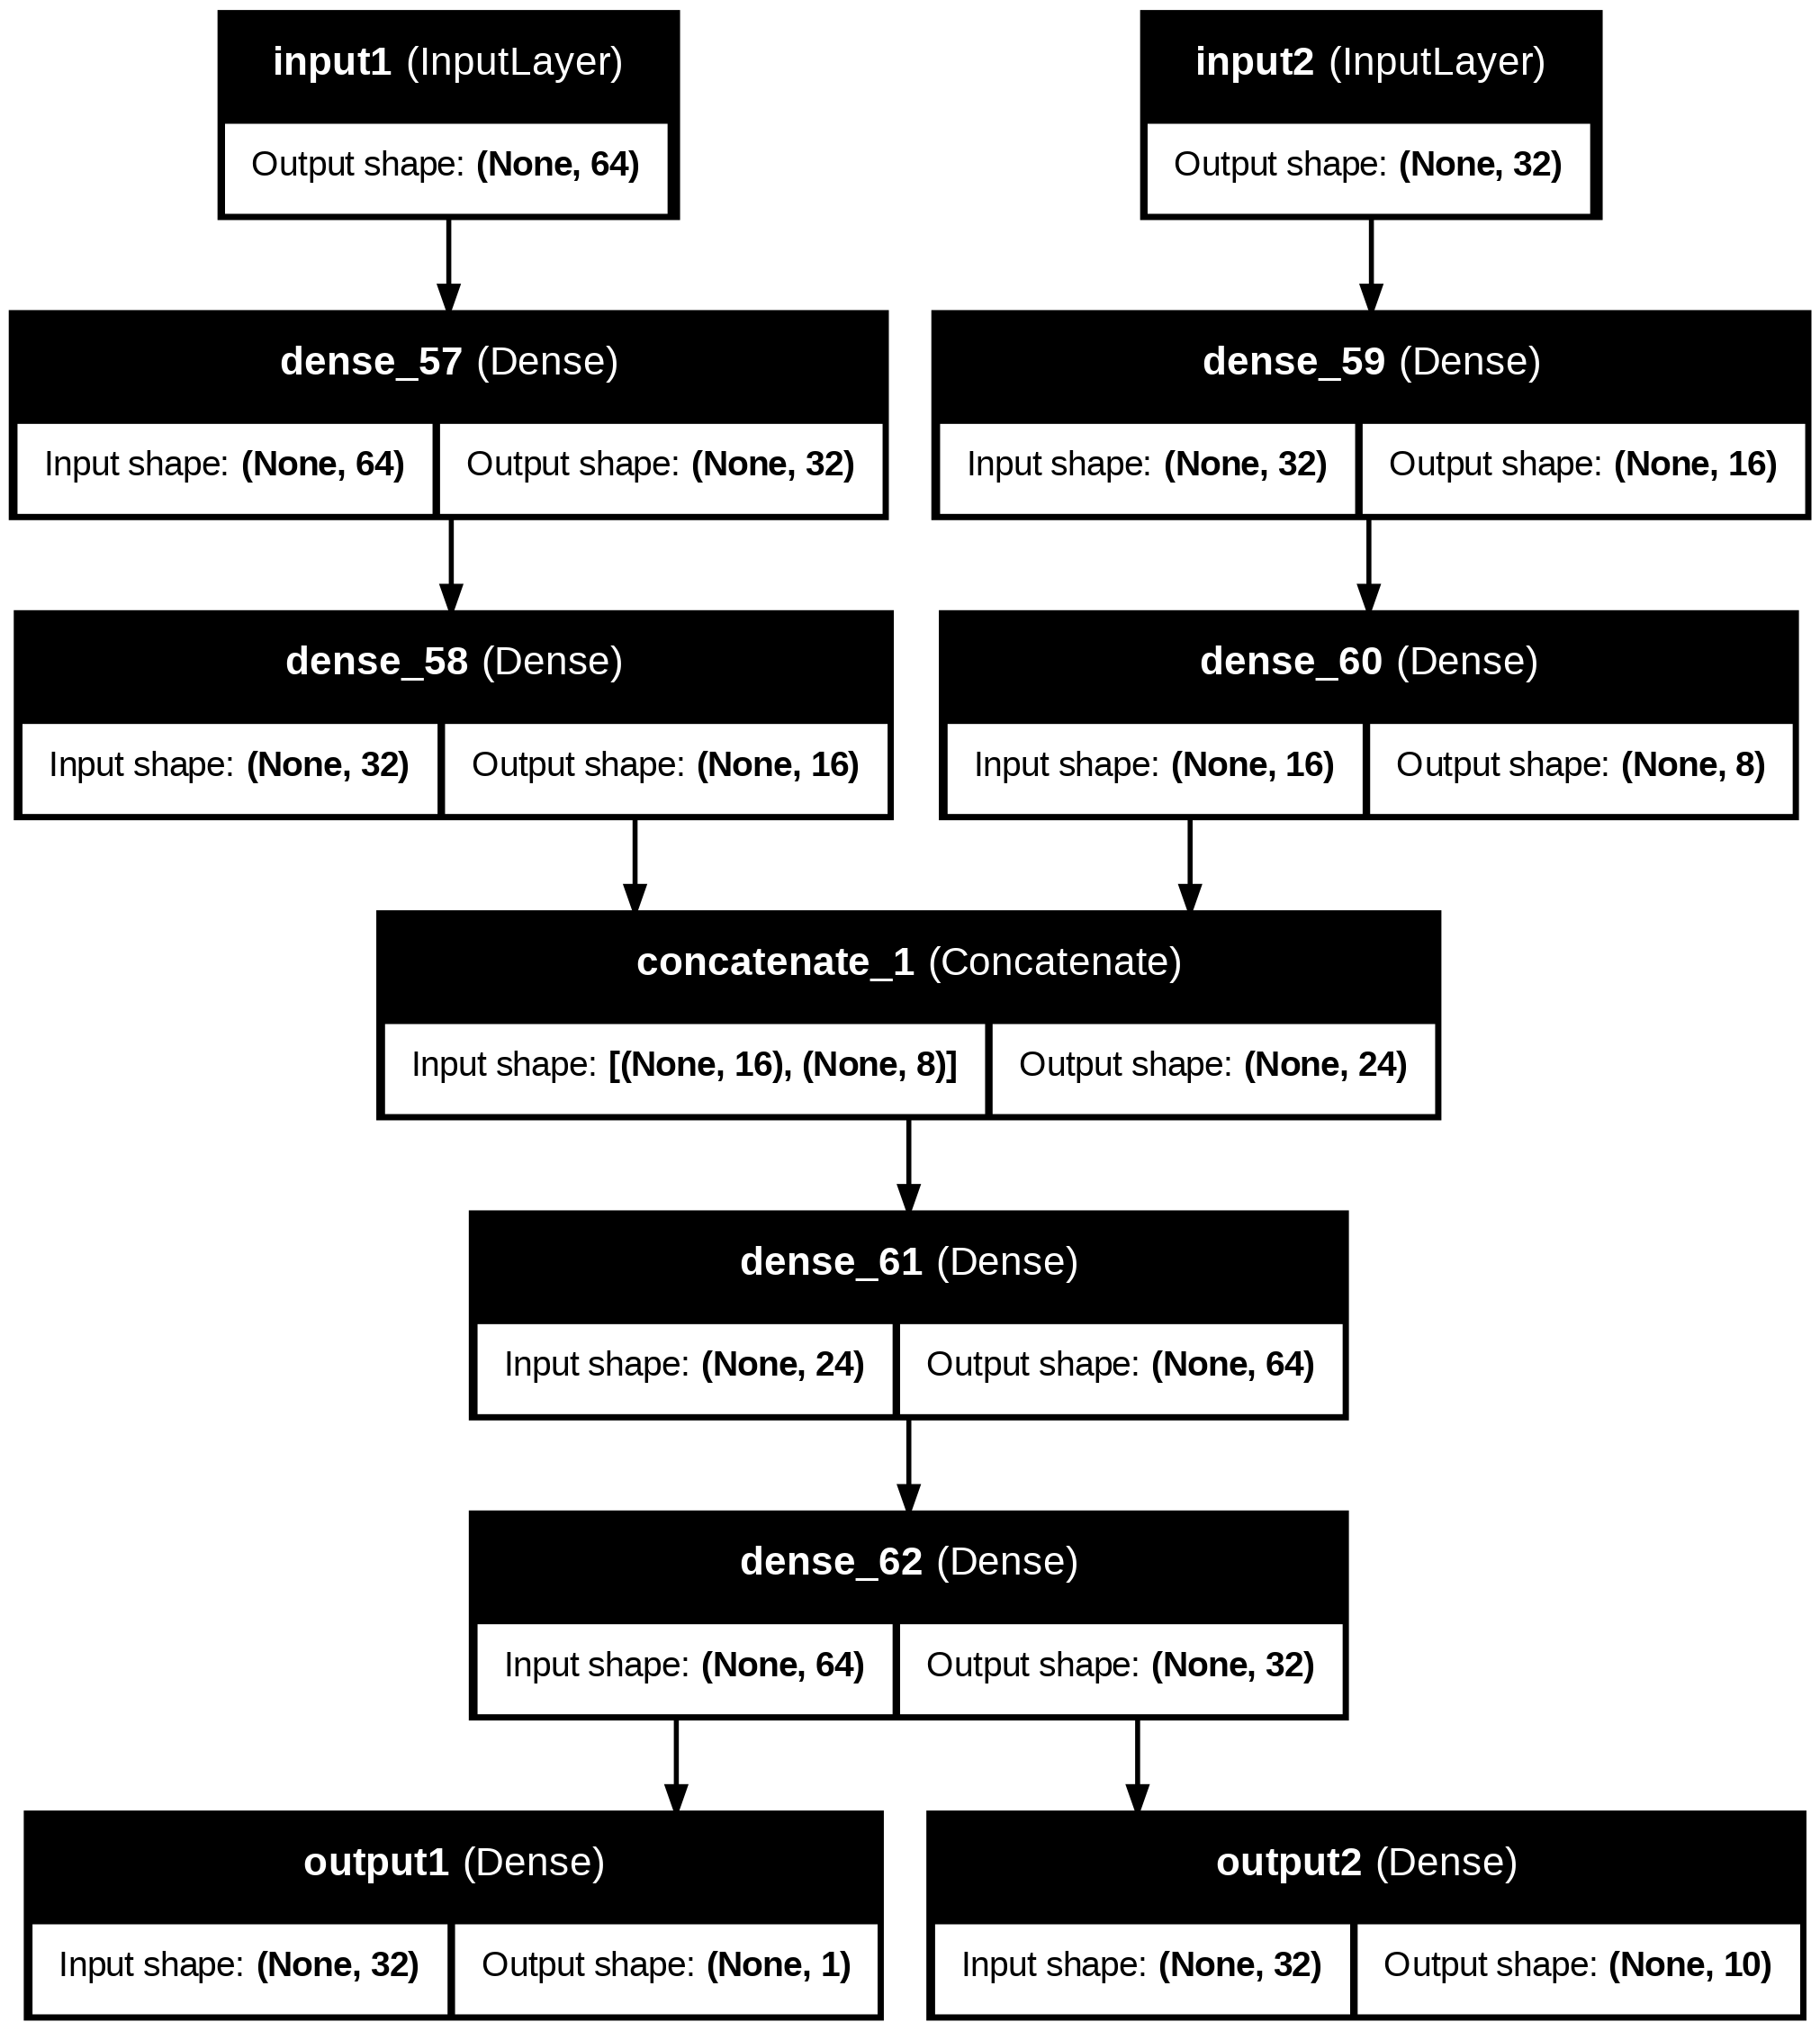

In [15]:
import keras
from keras import layers, models, Input

# Define the first input branch
input1 = Input(shape=(64,), name="input1")
x1 = layers.Dense(32, activation='relu')(input1)
x1 = layers.Dense(16, activation='relu')(x1)

# Define the second input branch
input2 = Input(shape=(32,), name="input2")
x2 = layers.Dense(16, activation='relu')(input2)
x2 = layers.Dense(8, activation='relu')(x2)

# Combine the branches by concatenating
combined = layers.Concatenate()([x1, x2])

# Shared dense layers after concatenation
shared = layers.Dense(64, activation='relu')(combined)
shared = layers.Dense(32, activation='relu')(shared)

# First output branch
output1= layers.Dense(1, activation='sigmoid', name="output1")(shared)

# Second output branch
output2 = layers.Dense(10, activation='softmax', name="output2")(shared)

# Create the model with two inputs and two outputs
model = models.Model(inputs=[input1, input2], outputs=[output1, output2])

# Display the model summary
model.summary()

# Visualize the model structure
keras.utils.plot_model(model, to_file="multi_input_output_model.png", show_shapes=True, show_layer_names=True)
from IPython.display import Image, display
display(Image(filename="multi_input_output_model.png", width=700))


In [16]:
import numpy as np
N = 500
X1 = np.random.randn(N, 64).astype("float32")
X2 = np.random.randn(N, 32).astype("float32")
y_bin = np.random.randint(0, 2, size=(N, 1)).astype("float32")  # output1
y_cls = np.random.randint(0, 10, size=(N,)).astype("int32")     # output2 (sparse)

# compile
model.compile(
    optimizer=keras.optimizers.Adam(1e-3),
    loss={
        "output1": "binary_crossentropy",
        "output2": "sparse_categorical_crossentropy",
    },
    metrics={
        "output1": ["accuracy", keras.metrics.AUC(name="auc")],
        "output2": ["accuracy"],
    },
    loss_weights={"output1": 1.0, "output2": 1.0},
)

# fit
history = model.fit({"input1": X1, "input2": X2}, {"output1": y_bin, "output2": y_cls},
    validation_split=0.2, epochs=10, batch_size=64,
    callbacks=[keras.callbacks.EarlyStopping(monitor="val_loss", patience=3, restore_best_weights=True)],
    verbose=1,
)

# ---- PŘEDPIS POUŽITÍ PŘI PREDIKCI ----
y1_prob, y2_prob = model.predict({"input1": X1[:5], "input2": X2[:5]})

Epoch 1/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 100ms/step - loss: 3.0755 - output1_accuracy: 0.5103 - output1_auc: 0.4117 - output1_loss: 0.7421 - output2_accuracy: 0.1062 - output2_loss: 2.3360 - val_loss: 3.0729 - val_output1_accuracy: 0.4500 - val_output1_auc: 0.4040 - val_output1_loss: 0.7187 - val_output2_accuracy: 0.1200 - val_output2_loss: 2.3417
Epoch 2/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 2.9953 - output1_accuracy: 0.5094 - output1_auc: 0.5013 - output1_loss: 0.6962 - output2_accuracy: 0.1287 - output2_loss: 2.2991 - val_loss: 3.0605 - val_output1_accuracy: 0.4300 - val_output1_auc: 0.4183 - val_output1_loss: 0.7128 - val_output2_accuracy: 0.0900 - val_output2_loss: 2.3366
Epoch 3/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 2.9719 - output1_accuracy: 0.5173 - output1_auc: 0.5213 - output1_loss: 0.6940 - output2_accuracy: 0.1618 - output2_loss: 2.2747 - val_loss: 3.0602 - val_output1_accuracy: 0.4100 - val_output1_auc: 0.4273 - val_output1_loss: 0.7123 - val_output2_ac